In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src")

In [2]:
from simulation import BaseSimulation
from individual_interaction_population import IndividualInteractionPopulation
from base_test_protocol import EmptyTestProtocol

In [9]:
import numpy as np
np.random.choice(range(1000))

374

In [10]:
def run_simulation(n_agents, interactions_per_person, interaction_infection_pct, time_horizon, verbose=True):
    #n_agents = int(1E3)
    disease_length = 14
    quarantine_length = 14
    days_until_symptomatic = 7

    #interactions_per_person = 1
    interaction_frequency_lambda =  interactions_per_person * n_agents 
    #interaction_infection_pct = 0.3

    population = IndividualInteractionPopulation(n_agents,
                                                disease_length,
                                                quarantine_length,
                                                days_until_symptomatic,
                                                interaction_frequency_lambda,
                                                interaction_infection_pct,
                                                initial_prevalence=0.005)
    
    # select only a single individual to be infected:
    infected_agent = np.random.choice(range(n_agents))
    for agent_idx in range(n_agents):
        if agent_idx == infected_agent:
            population.infection_status[agent_idx] = True
        else:
            population.infection_status[agent_idx] = False
    
    empty_protocol = EmptyTestProtocol()
    simulation = BaseSimulation(population, empty_protocol, test_frequency=100, test_latency=100)
    for day in range(time_horizon):
        simulation.step()
        if verbose:
            print("Done simulating day {}".format(day+1))
    
    return simulation

In [14]:
sim_results = {}
interactions_per_person_values = [0.5,1,3,10]
infection_pct = 0.05
time_horizon = 40

for interactions_pp in interactions_per_person_values:
    sim_results[interactions_pp] = []
    for x in range(25):
        sim = run_simulation(n_agents = 1000,
                            interactions_per_person=interactions_pp,
                            interaction_infection_pct = infection_pct,
                            time_horizon=time_horizon,
                            verbose=False)
        sim_results[interactions_pp].append(sim)
        print("Done iteration {} for interactions_pp value {}".format(x+1, interactions_pp))

Done iteration 1 for interactions_pp value 0.5
Done iteration 2 for interactions_pp value 0.5
Done iteration 3 for interactions_pp value 0.5
Done iteration 4 for interactions_pp value 0.5
Done iteration 5 for interactions_pp value 0.5
Done iteration 6 for interactions_pp value 0.5
Done iteration 7 for interactions_pp value 0.5
Done iteration 8 for interactions_pp value 0.5
Done iteration 9 for interactions_pp value 0.5
Done iteration 10 for interactions_pp value 0.5
Done iteration 11 for interactions_pp value 0.5
Done iteration 12 for interactions_pp value 0.5
Done iteration 13 for interactions_pp value 0.5
Done iteration 14 for interactions_pp value 0.5
Done iteration 15 for interactions_pp value 0.5
Done iteration 16 for interactions_pp value 0.5
Done iteration 17 for interactions_pp value 0.5
Done iteration 18 for interactions_pp value 0.5
Done iteration 19 for interactions_pp value 0.5
Done iteration 20 for interactions_pp value 0.5
Done iteration 21 for interactions_pp value 0.5
D

In [16]:
sim_results[0.5][0].summary_population_data

{-1: {'cumulative_num_infected': 0, 'num_infected': 1, 'num_quarantined': 0},
 0: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 1: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 2: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 3: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 4: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 5: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 6: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 7: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 8: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 9: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 10: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 11: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 

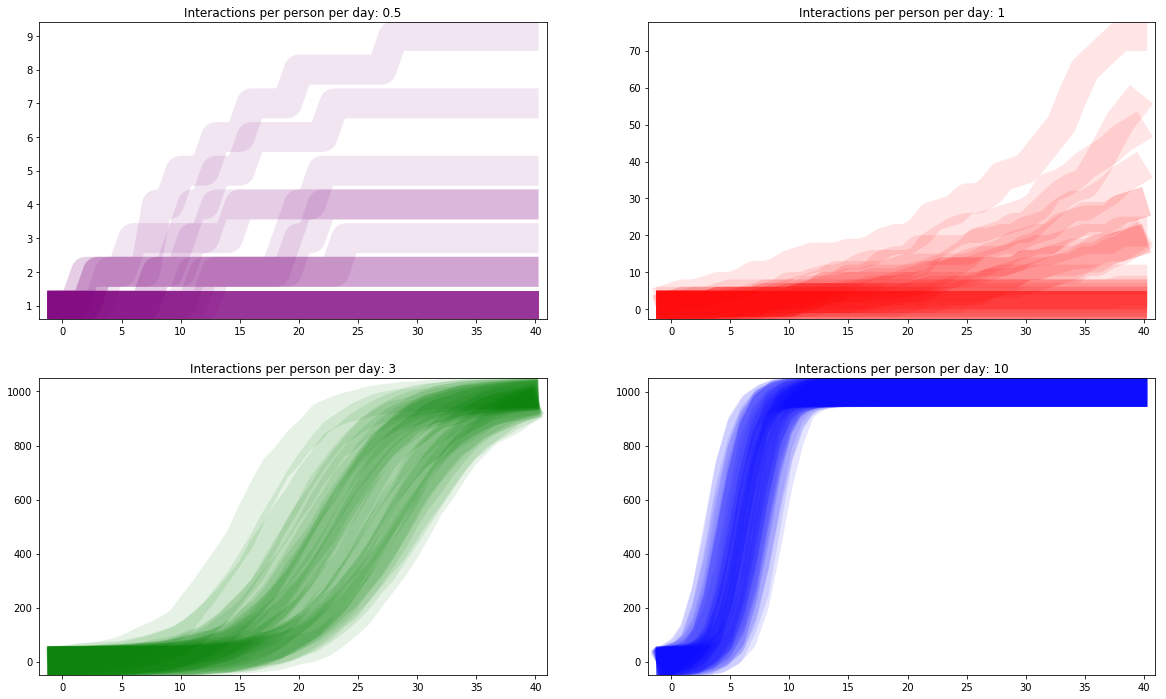

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(20,12))
interactions_per_person_values = [0.5,1,3,10]

colors={0.5:'purple', 1:'red', 3:'green', 10:'blue'}

days=list(range(time_horizon))
subplot_val = 221

for interactions_pp in interactions_per_person_values:
    plt.subplot(subplot_val)
    plt.title("Interactions per person per day: {}".format(interactions_pp))
    subplot_val += 1
    for sim in sim_results[interactions_pp]:
        infections = [sim.summary_population_data[day]['cumulative_num_infected'] for day in days]
        plt.plot(days, infections, label="{} Interactions per person per day".format(interactions_pp), 
                 linewidth=30.0, alpha=0.1, color=colors[interactions_pp])

plt.show()


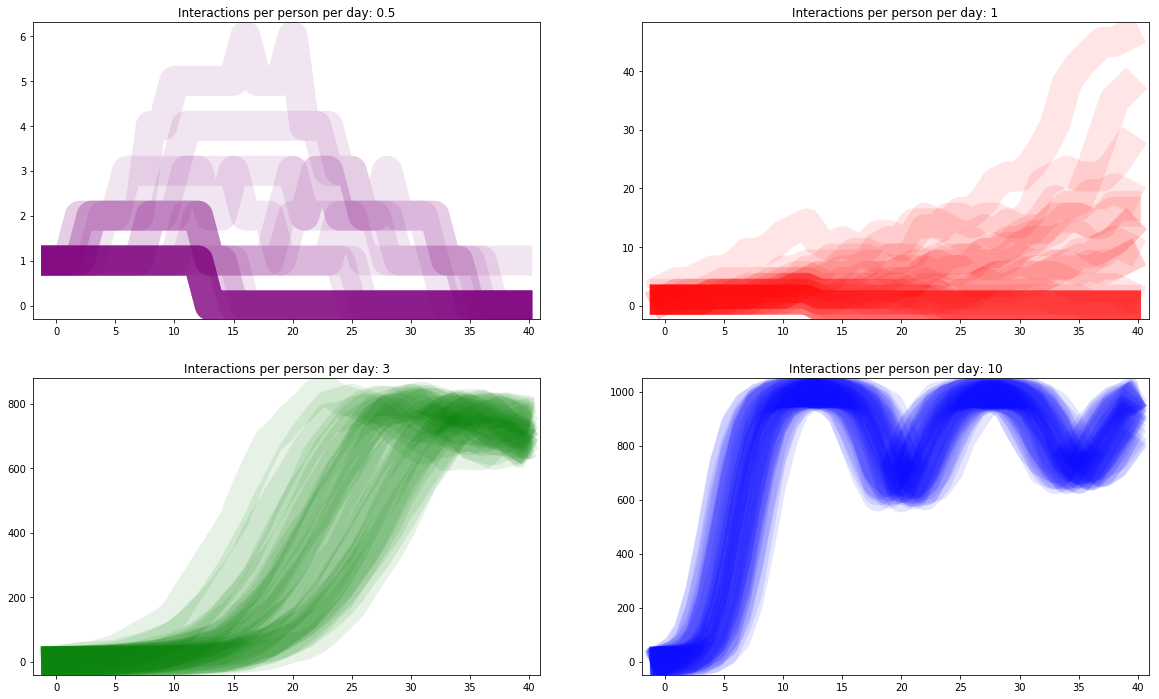

In [27]:

plt.figure(figsize=(20,12))
interactions_per_person_values = [0.5,1,3,10]

colors={0.5:'purple', 1:'red', 3:'green', 10:'blue'}

days=list(range(time_horizon))
subplot_val = 221

for interactions_pp in interactions_per_person_values:
    plt.subplot(subplot_val)
    plt.title("Interactions per person per day: {}".format(interactions_pp))
    subplot_val += 1
    for sim in sim_results[interactions_pp]:
        infections = [sim.summary_population_data[day]['num_infected'] for day in days]
        plt.plot(days, infections, label="{} Interactions per person per day".format(interactions_pp), 
                 linewidth=30.0, alpha=0.1, color=colors[interactions_pp])

plt.show()

In [23]:
empty_protocol = EmptyTestProtocol()

In [24]:
simulation = BaseSimulation(population, empty_protocol, test_frequency=2, test_latency=3)

In [30]:
simulation.step()

In [31]:
simulation.summary_population_data

{-1: {'num_infected': 3, 'num_quarantined': 0},
 0: {'num_infected': 4, 'num_quarantined': 0},
 1: {'num_infected': 7, 'num_quarantined': 0},
 2: {'num_infected': 15, 'num_quarantined': 0}}

In [11]:
empty_protocol.run_test('asdf')

TypeError: run_test() missing 1 required positional argument: 'population'

In [7]:
type(population.infection_status)

dict

In [10]:
import numpy as np
m = np.random.poisson(0.001, (10000,10000))

In [9]:
def test():
    return 1 == 1 or \
        2 != 2

In [10]:
test()

True